In [1]:
# 단어 빈도 분석 : 전체 문서 또는 문서별 단어의 출현 빈도

# 트럼프 연설문 파일 로딩
f=open('d:/data/text/trumph.txt', 'r')
lines=f.readlines()
f.close()
print(lines[0:100])

[" Chief Justice Roberts, President Carter, President Clinton, President Bush, President Obama, fellow Americans and people of the world, thank you. We, the citizens of America are now joined in a great national effort to rebuild our country and restore its promise for all of our people. Together, we will determine the course of America and the world for many, many years to come. We will face challenges. We will confront hardships, but we will get the job done. Every four years we gather on these steps to carry out the orderly and peaceful transfer of power. And we are grateful to President Obama and First Lady Michelle Obama for their gracious aid throughout this transition. They have been magnificent. Thank you. Today’s ceremony however, has very special meaning, because today, we are not merely transferring power from one administration to another or from one party to another, but we are transferring power from Washington, DC. And giving it back to you, the people. For too long, hav

In [2]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

tokenizer=RegexpTokenizer('[\w]+') # 숫자, 특수문자 제거
stop_words=stopwords.words('english') # 불용어 사전
words=lines[0].lower() # 모든 단어를 소문자로 변환
tokens=tokenizer.tokenize(words) # 단어 단위로 토큰화
stopped_tokens=[i for i in list(tokens) if not i in stop_words] # 불용어 제거
stopped_tokens2=[i for i in stopped_tokens if len(i)>1] # 사이즈가 1인 단어들 제거

In [3]:
import pandas as pd

pd.Series(stopped_tokens2).value_counts().head(10) # 연설문에 인용된 단어들을 빈도순으로 내림차순 정렬

america     20
american    11
people      10
country      9
one          8
nation       7
every        7
new          6
great        6
never        6
dtype: int64

Counter({'america': 20, 'american': 11, 'people': 10, 'country': 9, 'one': 8, 'every': 7, 'nation': 7, 'world': 6, 'great': 6, 'back': 6, 'never': 6, 'new': 6, 'president': 5, 'many': 5, 'today': 5, 'protected': 5, 'across': 5, 'right': 5, 'dreams': 5, 'god': 5, 'make': 5, 'americans': 4, 'thank': 4, 'citizens': 4, 'together': 4, 'power': 4, 'first': 4, 'wealth': 4, 'everyone': 4, 'day': 4, 'heart': 4, 'bring': 4, 'obama': 3, 'government': 3, 'jobs': 3, 'left': 3, 'factories': 3, 'families': 3, 'united': 3, 'whether': 3, 'millions': 3, 'foreign': 3, 'countries': 3, 'nations': 3, 'borders': 3, 'must': 3, 'bless': 3, 'national': 2, 'years': 2, 'face': 2, 'get': 2, 'done': 2, 'transferring': 2, 'another': 2, 'washington': 2, 'long': 2, 'share': 2, 'politicians': 2, 'victories': 2, 'triumphs': 2, 'capital': 2, 'land': 2, 'moment': 2, 'states': 2, 'truly': 2, 'forgotten': 2, 'men': 2, 'women': 2, 'longer': 2, 'movement': 2, 'exists': 2, 'children': 2, 'safe': 2, 'good': 2, 'righteous': 2, '

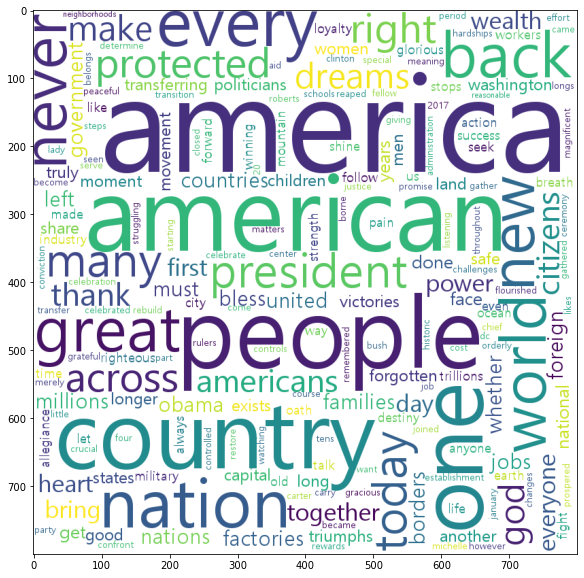

In [5]:
# 워드 클라우드
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

# 트럼프 연설문을 워드 클라우드로 표현
# 폰트 경로, 워드 클라우드의 가로, 세로 사이즈
wordcloud=WordCloud(font_path='c:/windows/fonts/malgun.ttf', width=800, height=800, background_color='white')

count=Counter(stopped_tokens2) # 단어별 출현 횟수 저장
print(count)
wordcloud=wordcloud.generate_from_frequencies(count)

fig=plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [15]:
# 뉴스 기사를 하나 찾아서 news1.txt로 저장
from konlpy.tag import Hannanum

f=open('d:/data/text/news1.txt','r', encoding='utf-8')
lines=f.readlines()
f.close()

han=Hannanum() # 한나눔 형태소 분석기
temp=[]
for i in range(len(lines)):
    # 명사만 추출
    a=lines[i].strip()
    temp.append(han.nouns(a))

# 2차원 리스트를 1차원 리스트로 변환하는 함수
def flatten(items):
    flatList=[]
    for elem in items:
        if type(elem)==list:
            for e in elem:
                flatList.append(e)
        else:
            flatList.append(elem)
    return flatList

word_list=flatten(temp)

word_list=pd.Series([x for x in word_list if len(x)>1]) # 두 글자 이상인 단어만 추출

In [17]:
word_list.value_counts().head(10) # 단어별 출현 빈도

가격     6
비주얼    5
맥주     5
치킨     4
신제품    4
메뉴     4
마리     3
감귤칩    3
개발     3
소스     3
dtype: int64

In [18]:
# 불용어 처리
stopwords=['이', '바']
word_list2=[i for i in word_list if i not in stopwords]

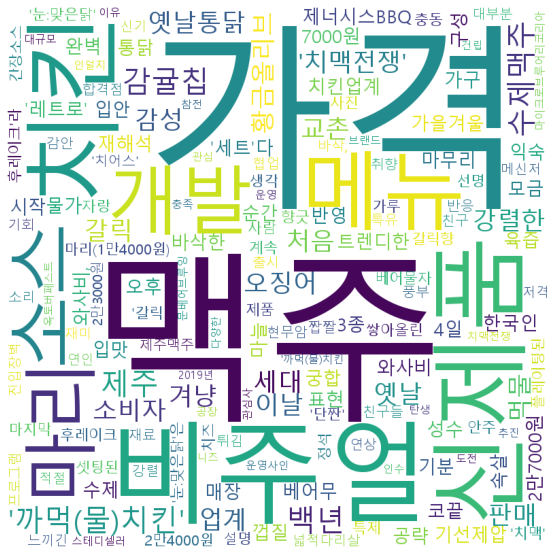

In [21]:
# 한글 뉴스를 워드 클라우드로 출력
from collections import Counter
from wordcloud import WordCloud

wordcloud=WordCloud(font_path='c:/windows/fonts/malgun.ttf', width=800, height=800, background_color='white')
count=Counter(word_list2)
wordcloud=wordcloud.generate_from_frequencies(count)
fig=plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
